In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Paths & URLs

import os

# Enable CUDA stacktrace reporting for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = "1"
os.environ['PYTORCH_NO_CUDA_MEMORY_CACHING'] = "1"
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# Directorio base
#PATH_BASE = '/content/drive/MyDrive/proximity'
#PATH_BASE = 'C:\\Users\\User\\Documents\\Proyecto Proximity'
PATH_BASE = 'E:\\files\\Documents\\Proyecto Proximity'

# Data release actual
DR70_PATH = os.path.join(PATH_BASE, 'DR70')
DR70_CT_PATH = os.path.join(DR70_PATH, 'datalake_sorted')
DR70_LABELS_PATH = os.path.join(DR70_PATH, 'labels.csv')

# Data release 176
DR176_PATH = os.path.join(PATH_BASE, 'DR176')
DR176_CT_PATH = os.path.join(DR176_PATH, 'DR176_studies')
DR176_LABELS_PATH = os.path.join(PATH_BASE, 'reports_with_label.csv')


# Data release 217
DR217_PATH = os.path.join(PATH_BASE, 'DR217')
DR217_CT_PATH = os.path.join(DR217_PATH, 'DR217_studies')
DR217_LABELS_PATH = os.path.join(DR217_PATH, 'DR217_labels.csv')
# Used for normalization of the intensity values for each CT
DR217_CT_HISTOGRAM_LANDMARKS_PATH = os.path.join(DR217_PATH, 'DR217_histogram_landmarks.npy')
# Embeddings ResNet18 DR217
DR217_RESNET_EMBEDDINGS_PATH = os.path.join(DR217_PATH, 'DR217_resnet18_embeddings')

# Synth dataset v1
SYNTH_DATASET_V1_PATH = os.path.join(PATH_BASE, 'Synth dataset v1', 'v1', 'npz')

# CTs in Nibabel format
CT_NIBABEL_PATH = os.path.join(PATH_BASE, 'DR70', 'CTs')

# Embeddings visuales de CTs
#CT_EMBEDDINGS_PATH = DATA_RELEASE_PATH + '/visual_embeddings'


# Etiquetas de los CTs del data release actual
#CT_LABELS_CSV_PATH = DATA_RELEASE_PATH + '/labels.csv'

# Data release (CTs + etiquetas) organizados en un DataFrame
#CT_DATASET_DF_HDF_PATH = os.path.join(PATH_BASE, 'dataset_df.h5')
#CT_DATASET_DF_PICKLE_PATH = os.path.join(PATH_BASE, 'dataset_df.pickle')

# URLs de modelos visuales
#RESNET18_URL = 'microsoft/resnet-18'

# Path que contiene los resnet50 embeddings de CTs del data release actual
#CT_RESNET18_EMBEDDINGS_PATH = os.path.join(DR70_PATH, 'visual_embeddings', 'resnet18')
#CT_RESNET18_EMBEDDINGS_PATH = os.path.join(DR70_PATH, 'visual_embeddings', 'resnet18', 'reshaped_averaged')

# Path de modelos entrenados en base a tripletas
TRIPLET_MODELS_PATH = os.path.join(PATH_BASE, 'retrieval_models', 'triplets')
TRIPLET_CHECKPOINTS_PATH = os.path.join(PATH_BASE, 'retrieval_models', 'triplets', 'checkpoints')

# Path de modelos entrenados con clasificacion
CLASSIFICATION_MODELS_PATH = os.path.join(PATH_BASE, 'retrieval_models', 'clasification')
CLASSIFICATION_CHECKPOINTS_PATH = os.path.join(CLASSIFICATION_MODELS_PATH, 'checkpoints')

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

proximity_vector_labels = [[0,0,0], [1,0,0], [0,1,0], [0,0,1], [1,0,1], [1,1,0], [0,1,1], [1,1,1]]
#proximity_vector_labels = [[1,0,0], [0,1,0], [0,0,1]]
#proximity_classes = ['(s/a)', 'c', 'n', 'q', 'c+n', 'c+q', 'n+q', 'c+n+q']
proximity_classes = ['(none)', 'Cube', 'Sphere', 'Tetra', 'Cube+Tetra', 'Cube+Sphere', 'Sphere+Tetra', 'All']
proximity_colors = ['#000000', '#ff0000', '#00ff00', '#0000ff',
              '#ff00ff', '#ffff00', '#00ffff', '#ffffff']
#proximity_colors = ['#ff0000', '#00ff00', '#0000ff']

mnist_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

def plot_embeddings(embeddings, targets, xlim=None, ylim=None, zlim=None):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_facecolor('#D1D1D1')

    xlim = (embeddings[:, 0].min(), embeddings[:, 0].max())
    xradius = (xlim[1] - xlim[0]) / 2
    xcenter = xlim[0] + xradius
    xlim = (xcenter - 1.1*xradius, xcenter + 1.1*xradius)

    ylim = (embeddings[:, 1].min(), embeddings[:, 1].max())
    yradius = (ylim[1] - ylim[0]) / 2
    ycenter = ylim[0] + yradius
    ylim = (ycenter - 1.1*yradius, ycenter + 1.1*yradius)
    '''
    zlim = (embeddings[:, 2].min(), embeddings[:, 2].max())
    zradius = (zlim[1] - zlim[0]) / 2
    zcenter = zlim[0] + zradius
    zlim = (zcenter - 1.1*zradius, zcenter + 1.1*zradius)
    '''
    #for i in range(len(proximity_vector_labels)):
    for i in set(targets):
        inds = np.where(targets==i)[0]
        #new_mask = [(t == proximity_vector_labels[i]).all() for t in targets]
        new_mask = inds
        #plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5, color=colors[i])
        #embeddings_x = (embeddings[new_mask,0] - embeddings[new_mask,0].min()) / (embeddings[new_mask,0].max() - embeddings[new_mask,0].min())
        #embeddings_y = (embeddings[new_mask,1] - embeddings[new_mask,1].min()) / (embeddings[new_mask,1].max() - embeddings[new_mask,1].min())
        #plt.scatter(embeddings_x, embeddings_y, alpha=0.5, edgecolors=proximity_colors[i], color=proximity_colors[i])
        ax.scatter(embeddings[new_mask,0], embeddings[new_mask,1], alpha=0.6, edgecolors=proximity_colors[i], color=proximity_colors[i])
    
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    '''
    if zlim:
        plt.zlim(zlim[0], zlim[1])
    '''
    plt.legend(proximity_classes)
    plt.show()

# Experimento 3: Entrenamiento por tripletas sobre dataset de volúmenes de tres clases

Objetivo: detección de esferas, cubos y tetrahedros en el volumen de entrada---Las clases no se excluyen, o sea, el dataset es multietiqueta

In [4]:
import numpy as np
import random
from pathlib import Path
from sklearn.model_selection import train_test_split
import torch
from torchvision.transforms import v2
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.utils.data import default_collate
from datasets import SynthVolumeDataset, BalancedBatchSampler, TripletDataLoader
from utils import determine_negative_compatibles


cuda = torch.cuda.is_available()

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

proximity_class_names = ['None', 'Cube', 'Sphere', 'Tetra']

proximity_vector_labels_dict = {
    0: [1,0,0,0],
    1: [0,1,0,0],
    2: [0,0,1,0],
    3: [0,0,0,1],
    4: [0,1,0,1],
    5: [0,1,1,0],
    6: [0,0,1,1],
    7: [0,1,1,1],
}

'''
proximity_vector_labels_dict = {
    0: [0,0,0],
    1: [1,0,0],
    2: [0,1,0],
    3: [0,0,1],
    4: [1,0,1],
    5: [1,1,0],
    6: [0,1,1],
    7: [1,1,1],
}
'''

training_split_ratio = 0.8
volumes_path_list = sorted(Path(SYNTH_DATASET_V1_PATH).glob('*.npz'))

# generate a list of corresponding labels
def get_class_id(label_vector):
    for (k, v) in proximity_vector_labels_dict.items():
        equals = label_vector == v
        if hasattr(equals, 'all'):
            if equals.all():
                return k
        else:
            if equals:
                return k
    return None

samples_path_list = [[]]*len(volumes_path_list)
labels_list = [[]]*len(volumes_path_list)
for i, p in enumerate(volumes_path_list):
    _, fname = os.path.split(p)
    info = fname.split('.')[0:-1]
    info = ''.join(info)
    info = info.split('_')
    fid = int(info[0])
    cube = int(info[1])
    sphere = int(info[2])
    tetrahedron = int(info[3])
    none_label = int(not 1 in [cube, sphere, tetrahedron])
    samples_path_list[ fid - 1 ] = p
    labels_list[ fid - 1 ] = [none_label, cube, sphere, tetrahedron]
labels_as_classes = torch.LongTensor([get_class_id(l) for l in labels_list])

negative_compatibles_dict = determine_negative_compatibles(proximity_vector_labels_dict)

x_train, x_test, y_train, y_test = train_test_split(samples_path_list, labels_as_classes, train_size=0.8, stratify=labels_as_classes, random_state=0)
#training_data_paths, validation_data_paths = torch.utils.data.random_split(volumes_path_list, num_split_data)

transforms_composite = v2.Compose([
    v2.Grayscale(num_output_channels=1),
    v2.Resize((100, 100)),
    v2.ToDtype(torch.float32, scale=True), # with scale=True, scales pixel values from [0, 255] to [0.0, 1.0]
    v2.Normalize(mean=[0.449], std=[0.226])
])

#triplet_training_set = SynthVolumeDataset(training_data_paths, transforms=transforms_composite, train=True)
#triplet_validation_set = SynthVolumeDataset(validation_data_paths, transforms=transforms_composite, train=False)
#triplet_training_set = SynthVolumeDatasetV1(training_data_paths, proximity_vector_labels_dict, preprocessed=True)
#triplet_validation_set = SynthVolumeDatasetV1(validation_data_paths, proximity_vector_labels_dict, preprocessed=True)
triplet_training_set = SynthVolumeDataset(x_train, y_train, preprocessed=True)
triplet_validation_set = SynthVolumeDataset(x_test, y_test, preprocessed=True)

print('Training set: count for each label')
for label, count in enumerate(np.bincount(sorted(triplet_training_set.labels_list))):
    print(f'label {label}: {count}')
print('Training set size:', len(triplet_training_set))
print()
print('Validation set: count for each label')
for label, count in enumerate(np.bincount(sorted(triplet_validation_set.labels_list))):
    print(f'label {label}: {count}')
print('Validation set size:', len(triplet_validation_set))

def collate(batch):
    batch = list(filter(lambda x:x is not None, batch))
    return default_collate(batch)

# balanced batch sampler: batch size is n_classes*n_samples. Each batch contains n_samples samples for n_classes different classes.
sampler_n_classes = 2
sampler_n_samples = 5
sampler_batch_size = sampler_n_classes * sampler_n_samples
train_batch_sampler = BalancedBatchSampler(triplet_training_set.labels_list, proximity_vector_labels_dict, n_classes=sampler_n_classes, n_samples=sampler_n_samples, multilabel=True)
test_batch_sampler = BalancedBatchSampler(triplet_validation_set.labels_list, proximity_vector_labels_dict, n_classes=sampler_n_classes, n_samples=sampler_n_samples, multilabel=True)

# Set up data loaders
#n_classes = 2
#batch_size = 8
kwargs = {'num_workers': 0, 'pin_memory': True} if cuda else {}
train_eval_loader = torch.utils.data.DataLoader(triplet_training_set, batch_size=sampler_batch_size, shuffle=False, **kwargs)
test_eval_loader = torch.utils.data.DataLoader(triplet_validation_set, batch_size=sampler_batch_size, shuffle=False, **kwargs)
triplet_train_loader = torch.utils.data.DataLoader(triplet_training_set, batch_sampler=train_batch_sampler, **kwargs)
triplet_test_loader = torch.utils.data.DataLoader(triplet_validation_set, batch_sampler=test_batch_sampler, **kwargs)
all_triplet_train_loader = TripletDataLoader(triplet_training_set, n_classes=sampler_n_classes, n_samples=sampler_n_samples, **kwargs)
all_triplet_test_loader = TripletDataLoader(triplet_validation_set, n_classes=sampler_n_classes, n_samples=sampler_n_samples, **kwargs)

# Set up the network and training parameters
from networks import SynthDataEmbeddingModel
from losses import OnlineTripletLoss
from utils import HardestNegativeTripletSelector
from metrics import AverageNonzeroTripletsMetric, TotalNonzeroTripletsMetric, NDCG, Recall

margin = 2.0
embedding_net = SynthDataEmbeddingModel(embedding_size=8)
model = embedding_net
if cuda:
    model.cuda()
    
loss_fn = OnlineTripletLoss(margin, HardestNegativeTripletSelector(margin), negative_compatibles_dict, print_interval=20)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, 200, gamma=0.5, last_epoch=-1)
n_epochs = 200
log_interval = 1



Training set: count for each label
label 0: 80
label 1: 80
label 2: 80
label 3: 80
label 4: 80
label 5: 80
label 6: 80
label 7: 80
Training set size: 640

Validation set: count for each label
label 0: 20
label 1: 20
label 2: 20
label 3: 20
label 4: 20
label 5: 20
label 6: 20
label 7: 20
Validation set size: 160


In [5]:
from trainer import Trainer

trainer = Trainer(
    triplet_train_loader, 
    triplet_test_loader,
    train_eval_loader, 
    test_eval_loader, 
    all_triplet_train_loader,
    all_triplet_test_loader,
    model, 
    loss_fn, 
    optimizer, 
    scheduler, 
    n_epochs, 
    cuda, 
    log_interval,
    TRIPLET_CHECKPOINTS_PATH,
    train_full_loader_switch=False,
    metrics=[
        AverageNonzeroTripletsMetric(), 
        TotalNonzeroTripletsMetric(), 
        NDCG(proximity_vector_labels_dict, proximity_class_names),
        Recall(proximity_vector_labels_dict, proximity_class_names),
        ],
    start_epoch=0,
)

trainer.fit()

TypeError: Trainer.__init__() missing 1 required positional argument: 'tensorboard_logs_dir'

In [7]:
torch.save(
    model.state_dict(),
    os.path.join(TRIPLET_CHECKPOINTS_PATH, f'triplets_epoch={200}_val-loss={3.7897}_avg-nonzero-triplets={310.0}.pth'),
)

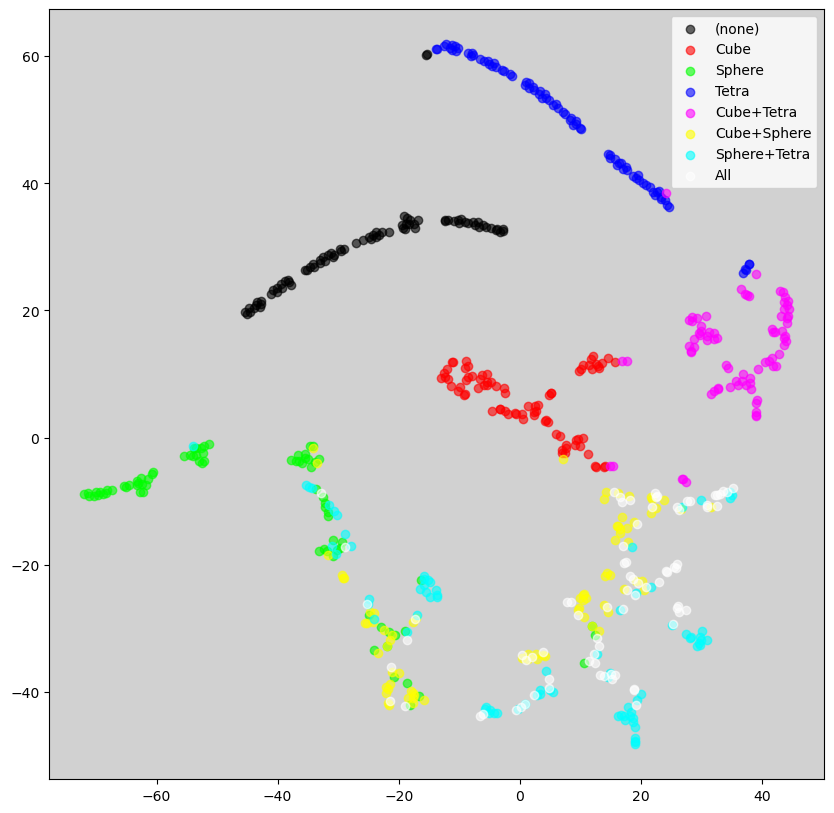

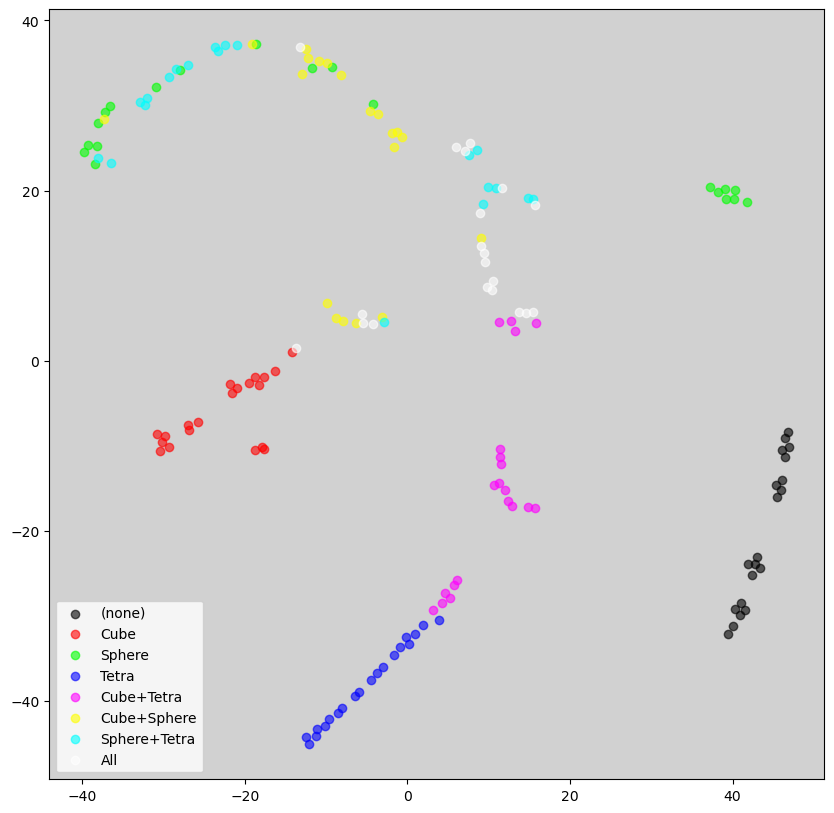

In [17]:
from utils import extract_embeddings
from sklearn.manifold import TSNE

#BEST_MODEL_PATH = os.path.join(TRIPLET_CHECKPOINTS_PATH, 'triplets_val-loss_0.0467_20240424_050251.pth')

#best_model = SynthDataEmbeddingModel(embedding_size=3).cuda()
#best_model.load_state_dict(torch.load(BEST_MODEL_PATH))

train_embeddings_tl, train_labels_tl = extract_embeddings(train_eval_loader, model)
train_tsne = TSNE(n_components=2, perplexity=10, learning_rate="auto", init="random")
train_embeddings_tsne = train_tsne.fit_transform(train_embeddings_tl.cpu().numpy())
plot_embeddings(train_embeddings_tsne, train_labels_tl.numpy())

test_embeddings_tl, test_labels_tl = extract_embeddings(test_eval_loader, model)
val_tsne = TSNE(n_components=2, perplexity=5, learning_rate="auto", init="random")
test_embeddings_tsne = val_tsne.fit_transform(test_embeddings_tl.cpu().numpy())
plot_embeddings(test_embeddings_tsne, test_labels_tl.numpy())


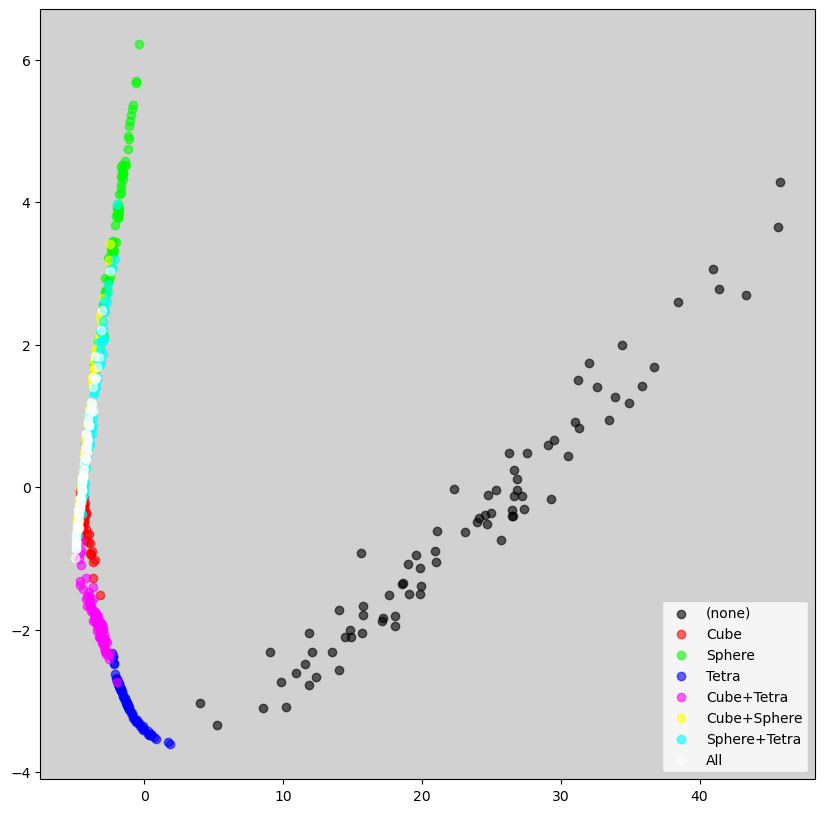

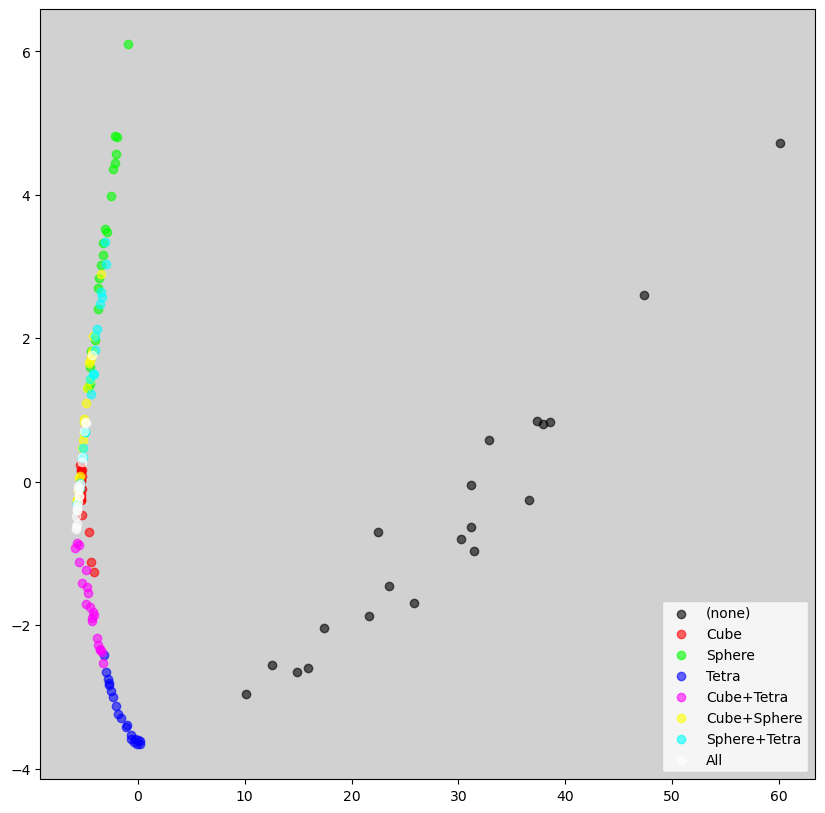

In [9]:
from utils import extract_embeddings
from sklearn.decomposition import PCA

#BEST_MODEL_PATH = os.path.join(TRIPLET_CHECKPOINTS_PATH, 'triplets_val-loss_0.0467_20240424_050251.pth')

#best_model = SynthDataEmbeddingModel(embedding_size=3).cuda()
#best_model.load_state_dict(torch.load(BEST_MODEL_PATH))

#train_embeddings_tl, train_labels_tl = extract_embeddings(train_eval_loader, model)
train_pca = PCA(n_components=2)
train_embeddings_pca = train_pca.fit_transform(train_embeddings_tl.cpu().numpy())
plot_embeddings(train_embeddings_pca, train_labels_tl.numpy())

#test_embeddings_tl, test_labels_tl = extract_embeddings(test_eval_loader, model)
val_pca = PCA(n_components=2)
test_embeddings_pca = val_pca.fit_transform(test_embeddings_tl.cpu().numpy())
plot_embeddings(test_embeddings_pca, test_labels_tl.numpy())

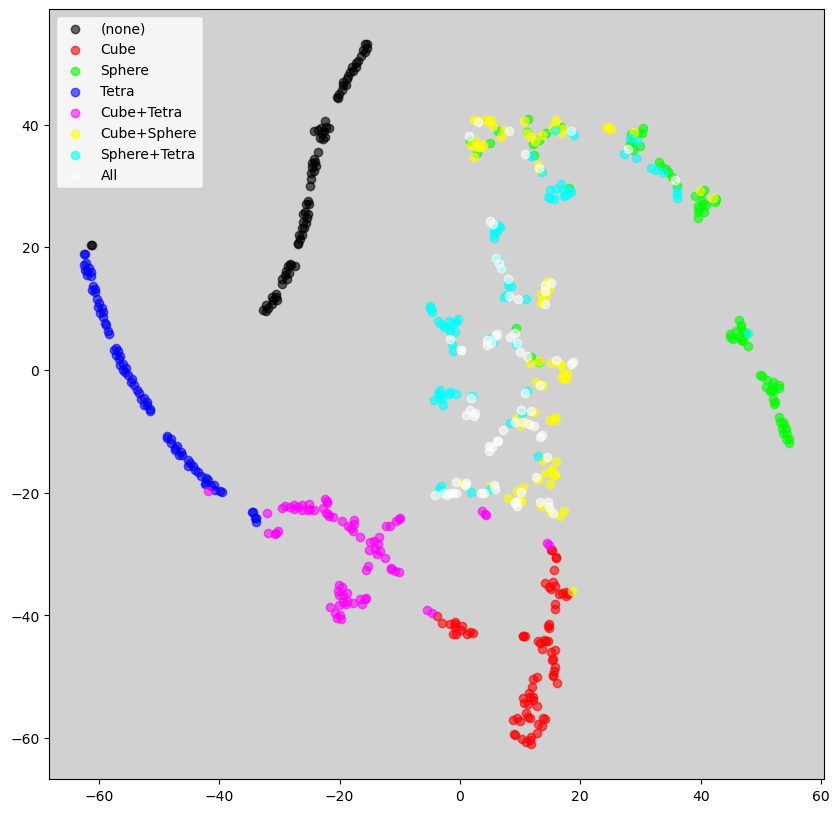

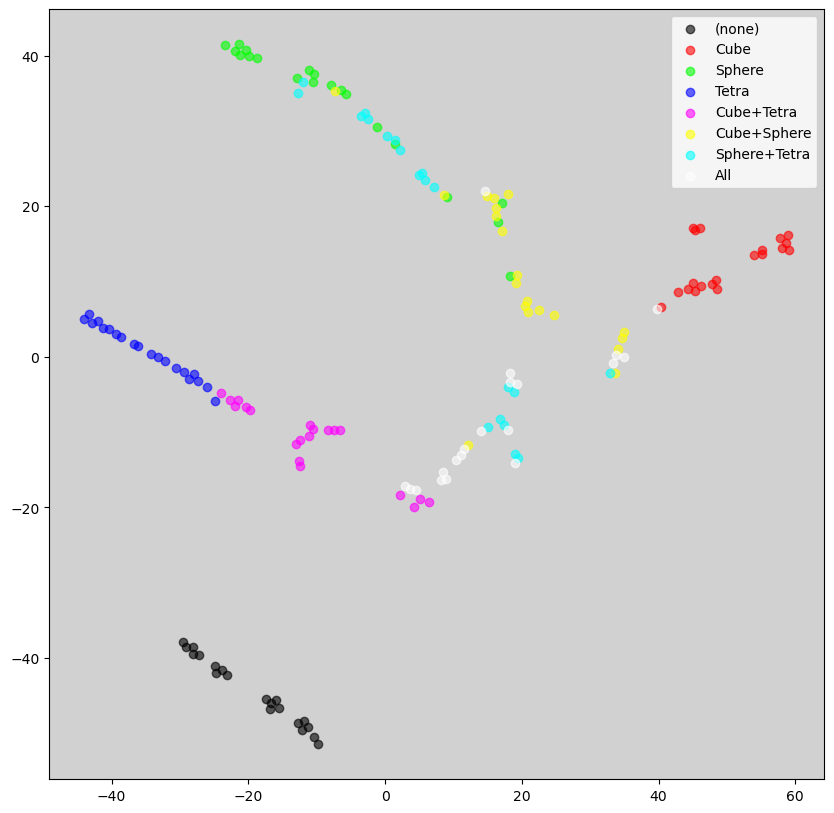

In [14]:
from utils import extract_embeddings
from sklearn.manifold import TSNE

BEST_MODEL_PATH = os.path.join(TRIPLET_CHECKPOINTS_PATH, 'triplets_epoch=200_val-loss=38.9467_avg-nonzero-triplets=162.0.pth')

best_model = SynthDataEmbeddingModel(embedding_size=8).cuda()
best_model.load_state_dict(torch.load(BEST_MODEL_PATH))

train_embeddings_tl, train_labels_tl = extract_embeddings(train_eval_loader, best_model)
train_tsne = TSNE(n_components=2, perplexity=10, learning_rate="auto", init="random")
train_embeddings_tsne = train_tsne.fit_transform(train_embeddings_tl.cpu().numpy())
plot_embeddings(train_embeddings_tsne, train_labels_tl.numpy())

test_embeddings_tl, test_labels_tl = extract_embeddings(test_eval_loader, best_model)
val_tsne = TSNE(n_components=2, perplexity=5, learning_rate="auto", init="random")
test_embeddings_tsne = val_tsne.fit_transform(test_embeddings_tl.cpu().numpy())
plot_embeddings(test_embeddings_tsne, test_labels_tl.numpy())


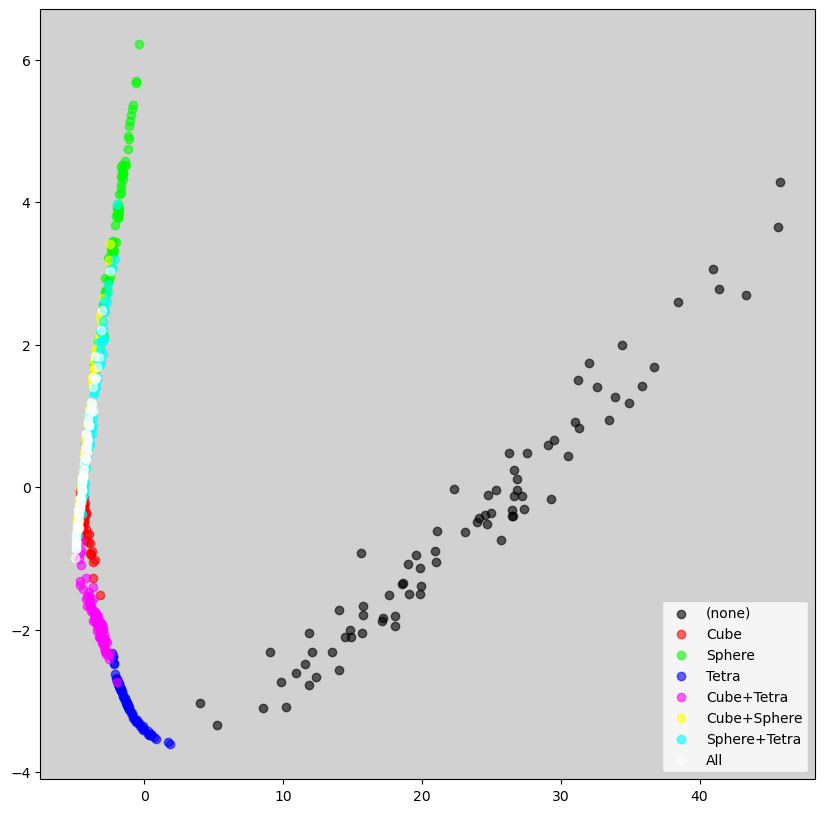

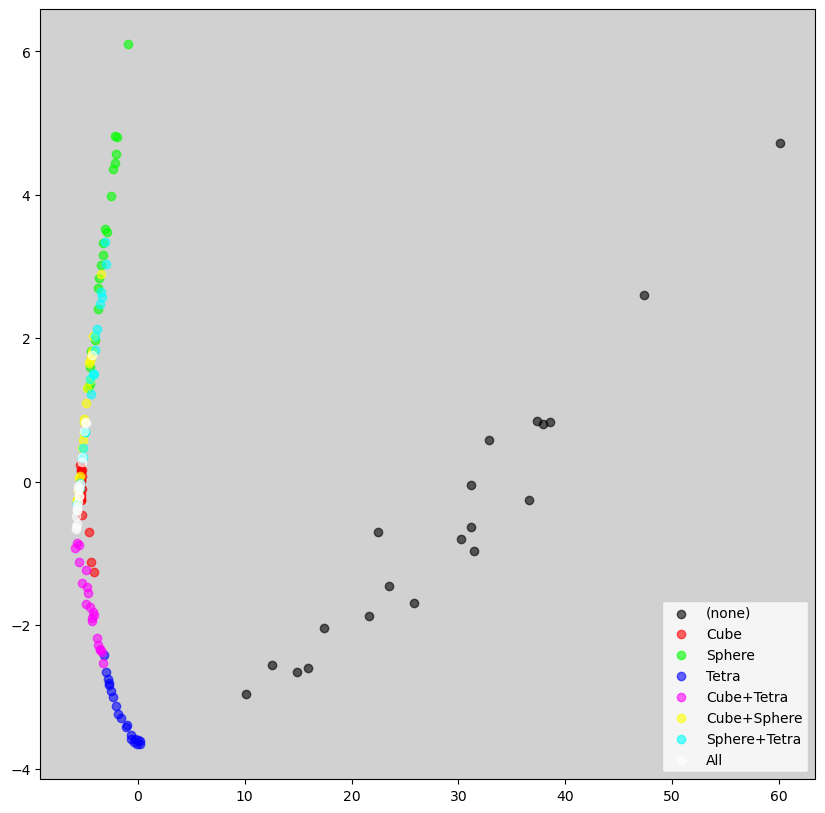

In [11]:
from utils import extract_embeddings
from sklearn.decomposition import PCA

#train_embeddings_tl, train_labels_tl = extract_embeddings(train_eval_loader, model)
train_pca = PCA(n_components=2)
train_embeddings_pca = train_pca.fit_transform(train_embeddings_tl.cpu().numpy())
plot_embeddings(train_embeddings_pca, train_labels_tl.numpy())

#test_embeddings_tl, test_labels_tl = extract_embeddings(test_eval_loader, model)
val_pca = PCA(n_components=2)
test_embeddings_pca = val_pca.fit_transform(test_embeddings_tl.cpu().numpy())
plot_embeddings(test_embeddings_pca, test_labels_tl.numpy())